In [ ]:
!pip install numpy matplotlib






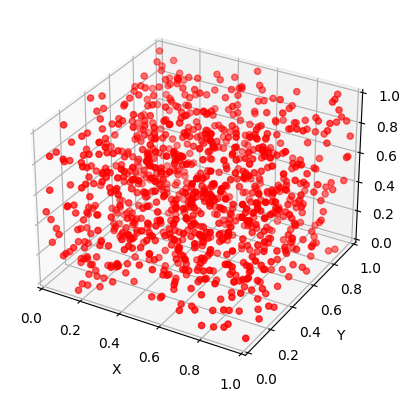

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Constants
ke = 8.9875517873681764e9  # Coulomb's constant in N m^2 C^-2
e = 1.602176634e-19  # Charge of a proton in C
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
proton_mass = 1.67262192369e-27  # Mass of a proton in kg

# Number of protons
num_protons = 1000  # Reduced for testing

# Universe dimensions
universe_size = 1e10  # Arbitrary large size in meters

# Initial positions and velocities of protons
initial_positions = np.random.uniform(0, universe_size, (num_protons, 3))
initial_velocities = np.random.uniform(-1, 1, (num_protons, 3))

# Function to calculate electrostatic force between two protons
def calculate_coulomb_force(r):
    return ke * e**2 / r**2

# Function to calculate gravitational force between two protons
def calculate_gravitational_force(r):
    return G * proton_mass**2 / r**2

# Function to calculate electrostatic force between two protons
def calculate_coulomb_force(r):
    return ke * e**2 / r**2

# Function to calculate gravitational force between two protons
def calculate_gravitational_force(r):
    return G * proton_mass**2 / r**2

def calculate_forces(positions):
    # Calculate pairwise distance vectors
    r_vecs = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
    r_magnitudes = np.linalg.norm(r_vecs, axis=2)
    np.fill_diagonal(r_magnitudes, np.inf)  # Avoid division by zero

    # Calculate forces
    coulomb_forces = calculate_coulomb_force(r_magnitudes)[:, :, np.newaxis] * (r_vecs / r_magnitudes[:, :, np.newaxis])
    gravitational_forces = calculate_gravitational_force(r_magnitudes)[:, :, np.newaxis] * (r_vecs / r_magnitudes[:, :, np.newaxis])

    # Sum forces
    total_forces = np.sum(coulomb_forces - gravitational_forces, axis=1)

    return total_forces

# Time step and total simulation time
time_step = 1e3 # seconds
total_time = 1e7  # seconds (reduced for testing)
num_steps = int(total_time / time_step)

# Initialize arrays for positions and velocities
positions = initial_positions.copy()
velocities = initial_velocities.copy()

# List to store positions for visualization
position_snapshots = [positions.copy()]

# Verlet integration to update positions and velocities
for step in range(num_steps):
    forces = calculate_forces(positions)
    new_positions = positions + velocities * time_step + (forces / proton_mass) * (time_step**2 / 2)

    new_forces = calculate_forces(new_positions)
    velocities = velocities + (forces + new_forces) / (2 * proton_mass) * time_step

    positions = new_positions

    # Store positions for visualization
    if step % (num_steps // 10) == 0:
        position_snapshots.append(positions.copy())

# Visualization of positions over time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(num, data, line):
    line._offsets3d = (data[num][:, 0], data[num][:, 1], data[num][:, 2])
    return line,

data = position_snapshots
line = ax.scatter(data[0][:, 0], data[0][:, 1], data[0][:, 2], c='r', marker='o')

ax.set_xlim([0, universe_size])
ax.set_ylim([0, universe_size])
ax.set_zlim([0, universe_size])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, len(data), fargs=(data, line), interval=100, blit=False)

plt.show()


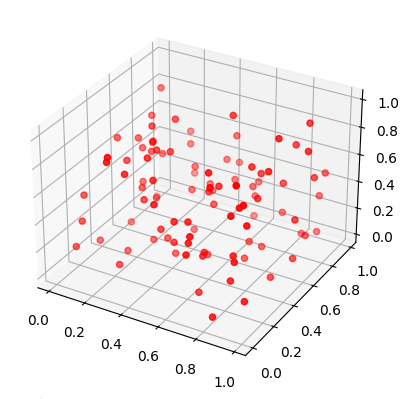

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Constants
ke = 8.9875517873681764e9  # Coulomb's constant in N m^2 C^-2
e = 1.602176634e-19  # Charge of a proton in C
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
proton_mass = 1.67262192369e-27  # Mass of a proton in kg

# Number of protons
num_protons = 100  # Reduced for testing

# Universe dimensions
universe_size = 1e-6  # Reduced for testing

# Initial positions and velocities of protons
initial_positions = np.random.uniform(0, universe_size, (num_protons, 3))
initial_velocities = np.random.uniform(-1, 1, (num_protons, 3)) * 1e-4  # Smaller velocities for testing

# Function to calculate electrostatic force between two protons
def calculate_coulomb_force(r):
    return ke * e**2 / r**2

# Function to calculate gravitational force between two protons
def calculate_gravitational_force(r):
    return G * proton_mass**2 / r**2

def calculate_forces(positions):
    # Calculate pairwise distance vectors
    r_vecs = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
    r_magnitudes = np.linalg.norm(r_vecs, axis=2)
    np.fill_diagonal(r_magnitudes, np.inf)  # Avoid division by zero

    # Calculate forces
    coulomb_forces = calculate_coulomb_force(r_magnitudes)[:, :, np.newaxis] * (r_vecs / r_magnitudes[:, :, np.newaxis])
    gravitational_forces = calculate_gravitational_force(r_magnitudes)[:, :, np.newaxis] * (r_vecs / r_magnitudes[:, :, np.newaxis])

    # Sum forces
    total_forces = np.sum(coulomb_forces - gravitational_forces, axis=1)

    return total_forces

# Time step and total simulation time
time_step = 1e-15  # seconds
total_time = 1e-12  # seconds (reduced for testing)
num_steps = int(total_time / time_step)

# Initialize arrays for positions and velocities
positions = initial_positions.copy()
velocities = initial_velocities.copy()

# List to store positions for visualization
position_snapshots = [positions.copy()]

# Verlet integration to update positions and velocities
for step in range(num_steps):
    forces = calculate_forces(positions)
    new_positions = positions + velocities * time_step + (forces / proton_mass) * (time_step**2 / 2)

    new_forces = calculate_forces(new_positions)
    velocities = velocities + (forces + new_forces) / (2 * proton_mass) * time_step

    positions = new_positions

    # Store positions for visualization
    if step % (num_steps // 100) == 0:
        position_snapshots.append(positions.copy())

# Visualization of positions over time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(num, data, scatter):
    ax.clear()
    ax.set_xlim([0, universe_size])
    ax.set_ylim([0, universe_size])
    ax.set_zlim([0, universe_size])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    scatter = ax.scatter(data[num][:, 0], data[num][:, 1], data[num][:, 2], c='r', marker='o')
    return scatter,

data = position_snapshots
scatter = ax.scatter(data[0][:, 0], data[0][:, 1], data[0][:, 2], c='r', marker='o')

ani = animation.FuncAnimation(fig, update, frames=len(data), fargs=(data, scatter), interval=100, blit=False)

plt.show()
